In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
import sweetviz

plt.style.use('ggplot')


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# load in the data 
df = pd.read_csv('~/Desktop/datasets/sales_data.csv')

In [3]:
# sales team has detected that their sales descreased in January 2022
# so try to determine the reasoning behind it
# first, explore the data and see what's going on 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6200 entries, 0 to 6199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Transaction #  6200 non-null   int64 
 1   Date           6200 non-null   object
 2   Salesperson    6200 non-null   object
 3   Product        6200 non-null   object
 4   Units          6200 non-null   int64 
 5   Unit price     6200 non-null   int64 
 6   Total          6200 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 339.2+ KB


In [6]:
# from the above information, we can tell the dataset has 
# 4 columns and 6200 rows, no missing value detected
# and the column Transaction # is irrelevant to our case 
# so dropping it
df.drop('Transaction #', axis = 1, inplace=True)

# convert to datetime
df['Date']=pd.to_datetime(df['Date'])


In [21]:
# because every single day's data for the last 5 years is there so let's 
# create a column to represent year-month so that when we analyze the data
# we can aggregate the data to get a clearer picture
df['y_m']=df['Date'].dt.to_period('M')
df['y_m']=df['y_m'].astype(str)


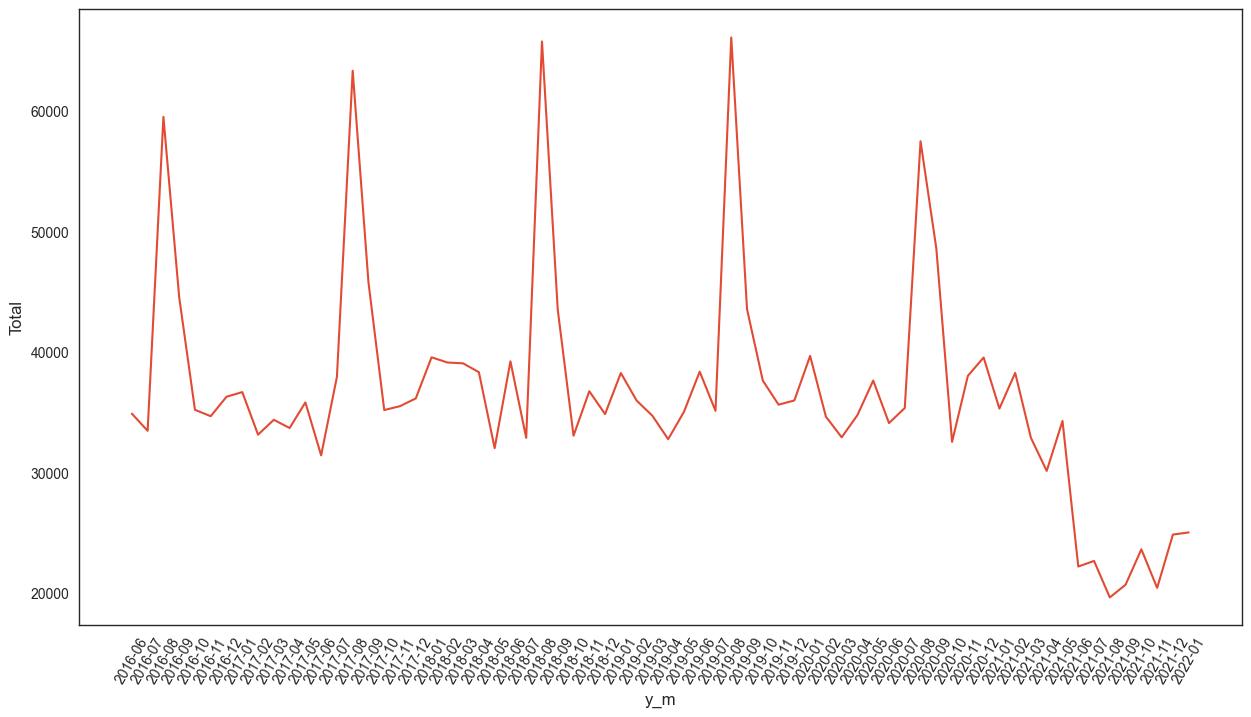

In [27]:
# visualize the data and see what's going on with total sales

total_group=df.groupby(by='y_m')['Total'].sum().reset_index()

plt.figure(figsize=(15,8))
sns.set_style('white')
total_plot=sns.lineplot(data=total_group, x='y_m', y='Total')
plt.xticks(rotation=60)
plt.show()


In [31]:
# from the visualization above
# sales starting to drop from 2021 May
# so let's filter the data down to 2021 May and afterwards

df1=df[df['y_m'] >= '2021-05-01']
df1['y_m']=df1['y_m'].dt.to_period('M')
df1['y_m']=df1['y_m'].astype(str)

/var/folders/l6/5kk7td194hj6cy130spmgcfr0000gn/T/ipykernel_22230/857829327.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['y_m']=df1['y_m'].dt.to_period('M')
/var/folders/l6/5kk7td194hj6cy130spmgcfr0000gn/T/ipykernel_22230/857829327.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['y_m']=df1['y_m'].astype(str)


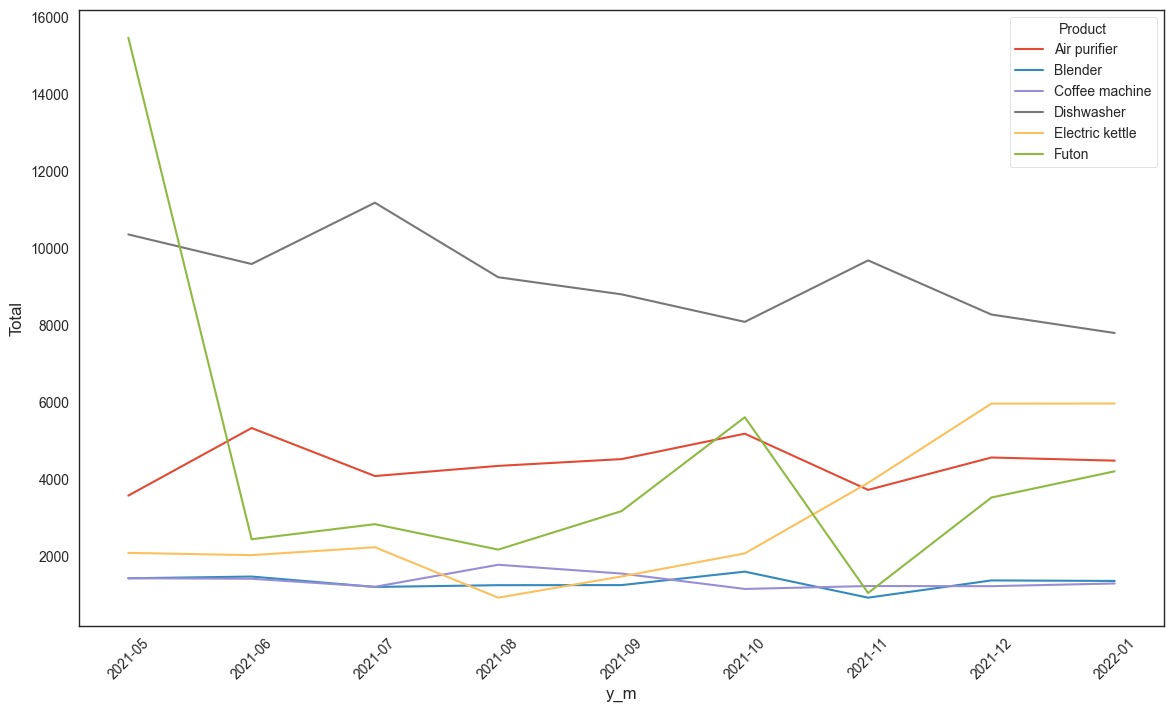

In [35]:
# now I want to look at sales total by product within the 2021 May onwards time frame

product_groupdf=df1.groupby(by=['y_m', 'Product'])['Total'].sum().reset_index()

plt.figure(figsize=(14,8))
sns.set_style('white')
sns.lineplot(data=product_groupdf, x='y_m', y='Total', hue='Product')
plt.xticks(rotation=45)
plt.show()

In [36]:
# from the above graph, we can clearly see that 
# among all product types, Futon is the only product that 
# decreases its sales drastically within this time frame
# count the futon sales sum per salesperson within this time frame

df2 = df1[df1['Product'] == 'Futon'].reset_index()

In [40]:
salesperson_group=df2.groupby(by=['y_m', 'Salesperson'])['Total'].sum().reset_index()
salesperson_group

,y_m,Salesperson,Total
0,2021-05,Amee Green,1020
1,2021-05,Forest Nicolas,714
2,2021-05,Ginny Daugherty,2804
3,2021-05,Lennie Kunze,1780
4,2021-05,Lisabeth Cummings,2151
5,2021-05,Myesha Ritchie,710
6,2021-05,Nichole Considine,3114
7,2021-05,Tanisha Fadel,3183
8,2021-06,Lisabeth Cummings,1404
9,2021-06,Nichole Considine,1026


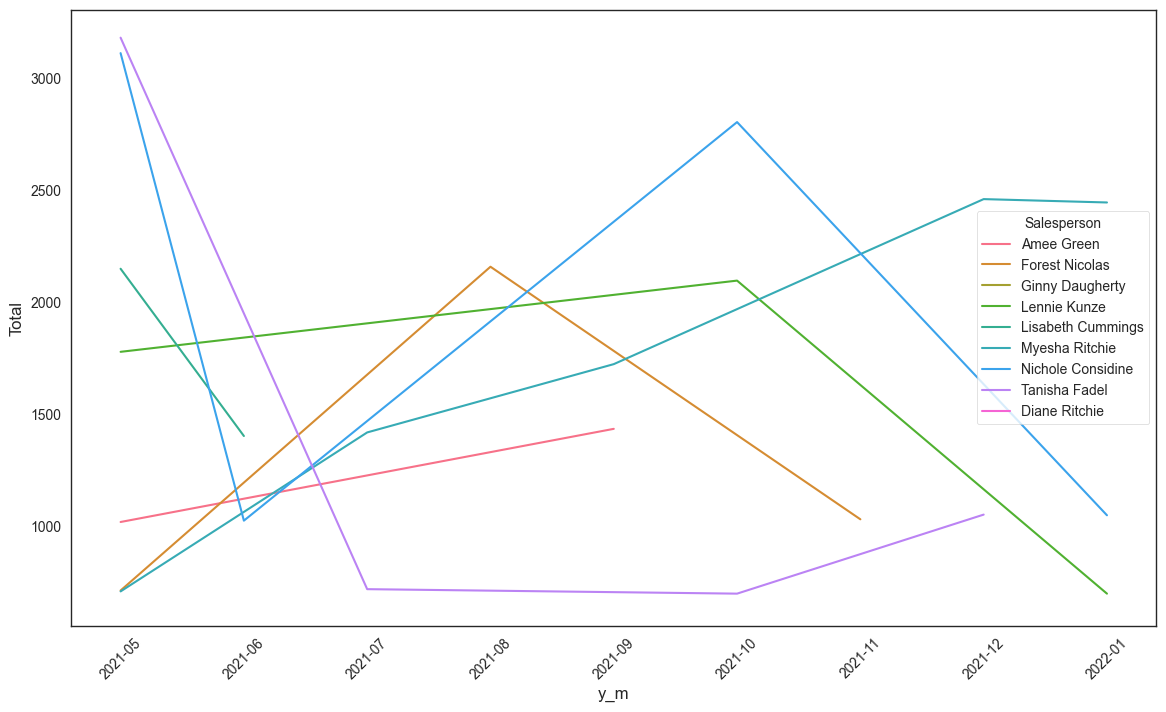

In [41]:
plt.figure(figsize=(14,8))
sns.set_style('white')
sns.lineplot(data=salesperson_group, x='y_m', y='Total', hue='Salesperson')
plt.xticks(rotation=45)
plt.show()

In [42]:
# okay so the above graph shows that there are less sales people selling futon over 
# the past few months and that might be causing the sales total to be decreasing
# so let's dig into how many sales people per month the futon category has 

salescount_group=df2.groupby(by=['y_m'])['Salesperson'].nunique().reset_index()
salescount_group

,y_m,Salesperson
0,2021-05,8
1,2021-06,2
2,2021-07,3
3,2021-08,1
4,2021-09,2
5,2021-10,3
6,2021-11,1
7,2021-12,2
8,2022-01,3


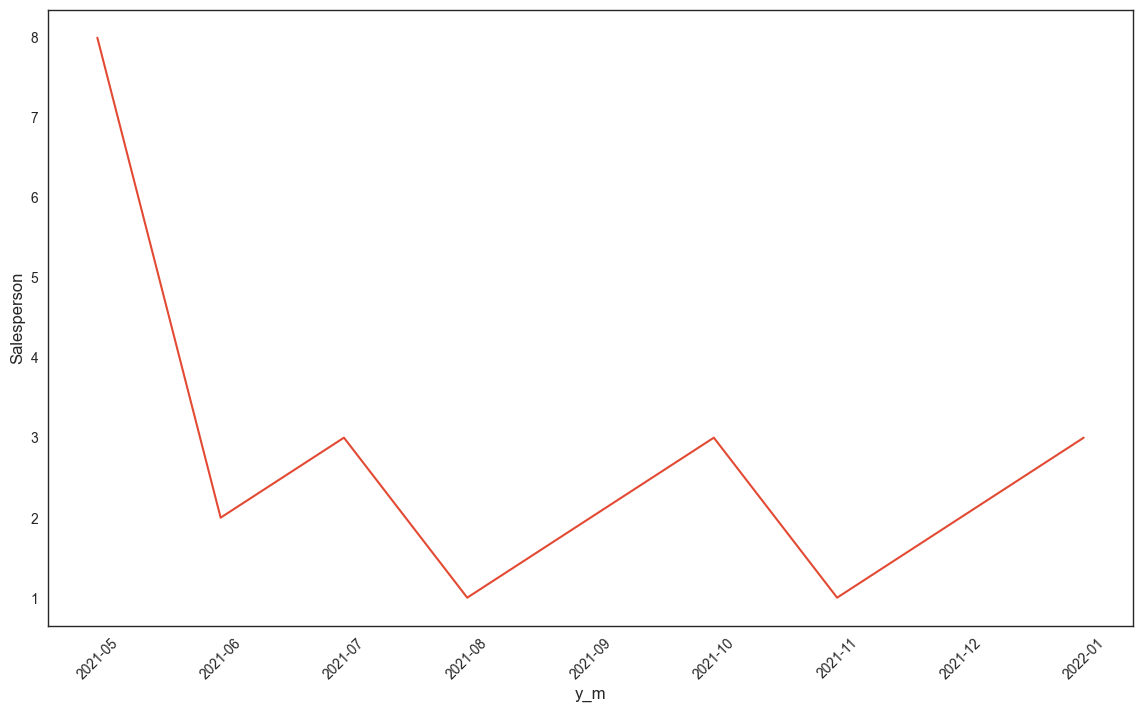

In [44]:
plt.figure(figsize=(14,8))
sns.set_style('white')
sns.lineplot(data=salescount_group, x='y_m', y='Salesperson')
plt.xticks(rotation=45)
plt.show()

In [46]:
# there we have the problem detected ^
# from the above plot, we have 8 sales reps selling futon in May 2021 and then the month later, June,
# there are only 2 sales reps selling futon and it continues like all the way to 2022 January
# something is going on with the futon industry.
# lastly let's graph the futon price and see if price also has fluctuation issues

futonprice_group= df2.groupby(by='y_m')['Unit price'].mean().reset_index()
futonprice_group

,y_m,Unit price
0,2021-05,352.000000
1,2021-06,346.500000
2,2021-07,352.000000
3,2021-08,360.000000
4,2021-09,352.000000
5,2021-10,350.833333
6,2021-11,344.000000
7,2021-12,351.333333
8,2022-01,349.750000


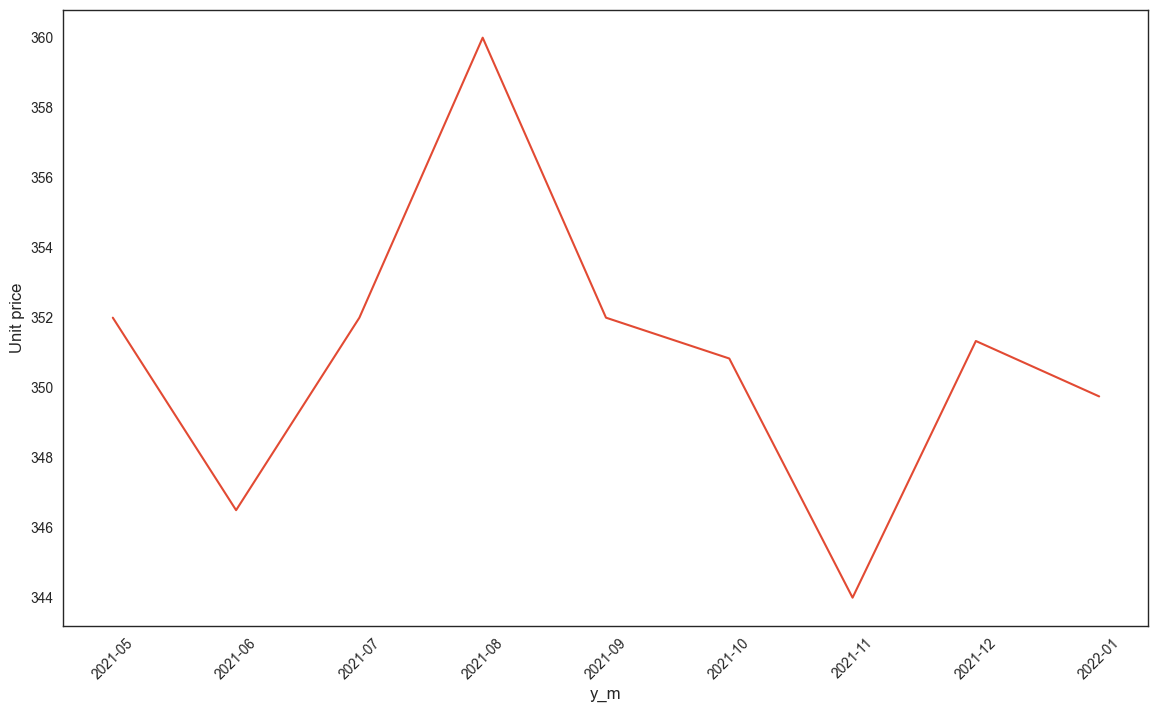

In [47]:
plt.figure(figsize=(14,8))
sns.set_style('white')
sns.lineplot(data=futonprice_group, x='y_m', y='Unit price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Indeed, from the above plot, futon average sales price spiked during August 2021